# COMP 6934 - Assignment 5
- Professor:       Terrence Tricco
- Term:            Winter 2024
- Student Name:    **Daniel Wiredu**
- Student User:    **dbwiredu**
- Student Email:   dbwiredu@mun.ca
- Student ID:      **202286594**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Question 1:

___

/var/folders/8r/hr5c8n_s09g6mx1_l9wgppxw0000gn/T/ipykernel_58990/640921143.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


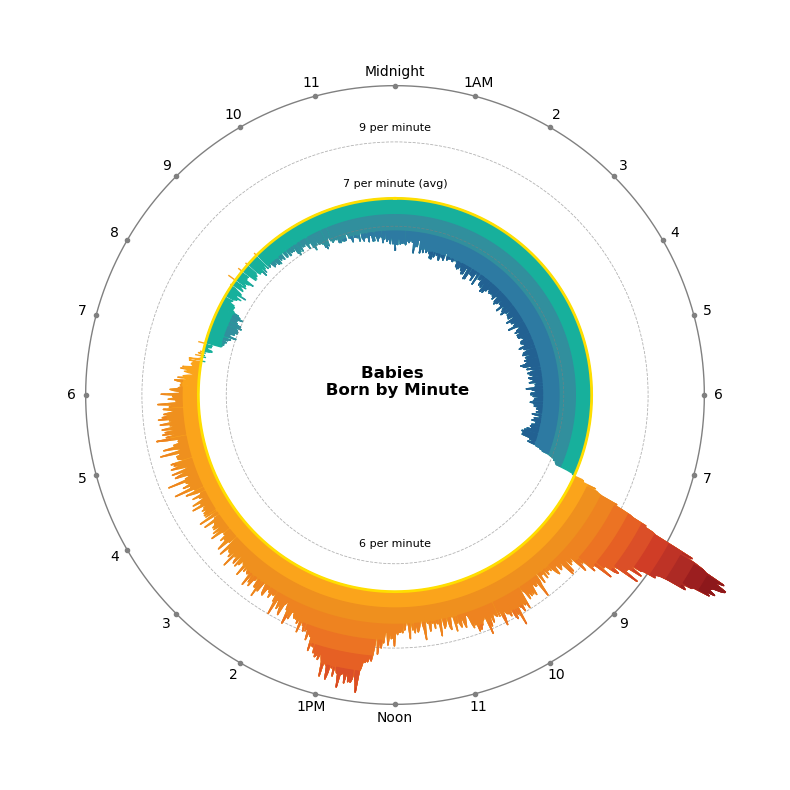

In [2]:
# Load the data
data = pd.read_csv("births.csv")

# Extract hour and minute from the time column
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['minute'] = data['time'].dt.minute

# Compute the total number of births per minute
births_per_minute = data.groupby(['hour', 'minute']).size().reset_index(name='births')
births_per_minute['births'] = births_per_minute['births'] / 365

# Compute the average number of births per minute
avg_bpm = births_per_minute['births'].mean()

# Define colors for the gradient
below_colors = ['#17b09c', '#318f9d', '#2d7aa2', '#226192', '#094e81']
above_colors = ['#fba41b', '#ef901e', '#ee8320', '#ec7323', '#e66024', '#db4f28', '#d03d26', '#be3326', '#ad2a24', '#9b1e1f', '#8d181b', '#7b1515']

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Compute the theta and r values
theta = np.linspace(0, 2 * np.pi, 1440)
r = births_per_minute['births'].values

perc_adjust = 0.0833
for i in range(len(below_colors)-1):
    ax.fill_between(theta, r, avg_bpm-(i*perc_adjust*avg_bpm), where=(r < avg_bpm-(i*perc_adjust*avg_bpm)), color=below_colors[i], zorder=i) 

for i in range(len(above_colors)-1):
    ax.fill_between(theta, r, avg_bpm+(i*perc_adjust*avg_bpm), where=(r > avg_bpm+(i*perc_adjust*avg_bpm)), color=above_colors[i], zorder=i) 

# Plot the average line
ax.plot(theta, [avg_bpm] * 1440, color='#ffde00', linewidth=2)

# Set the radial axis
ax.set_ylim(0, max(r))
ax.set_yticklabels('')
ax.set_yticks([6,7,9])

# Set the angular axis
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
x_ticklabels = ['Midnight','1AM','2','3','4','5','6','7','','9','10','11','Noon','1PM','2','3','4','5','6','7','8','9','10','11']
ax.xaxis.set_visible(False)

for hour in range(24):
    ax.plot(theta, [hour * 11] * 1440, linestyle='-', markersize=3, color='gray', linewidth=1)
    if hour != 8:
        ax.plot(np.radians(hour * 15), 11, 'o', markersize=3, color='grey')
        ax.annotate(x_ticklabels[hour], (np.radians(hour * 15), 11.5), va='center', ha='center')

# Add labels and other customization
ax.text(0, 7.4, '7 per minute (avg)', ha='center', fontsize=8)
ax.text(0, 9.4, '9 per minute', ha='center', fontsize=8)
ax.text(np.pi, 5.4, '6 per minute', ha='center', fontsize=8)
ax.text(0, 0, 'Babies \n Born by Minute', ha='center', weight='bold', fontsize=12)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.spines['polar'].set_visible(False)

ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.6, alpha=0.6)
ax.grid(axis='x', visible=False)

plt.show()

## Question 2:

___

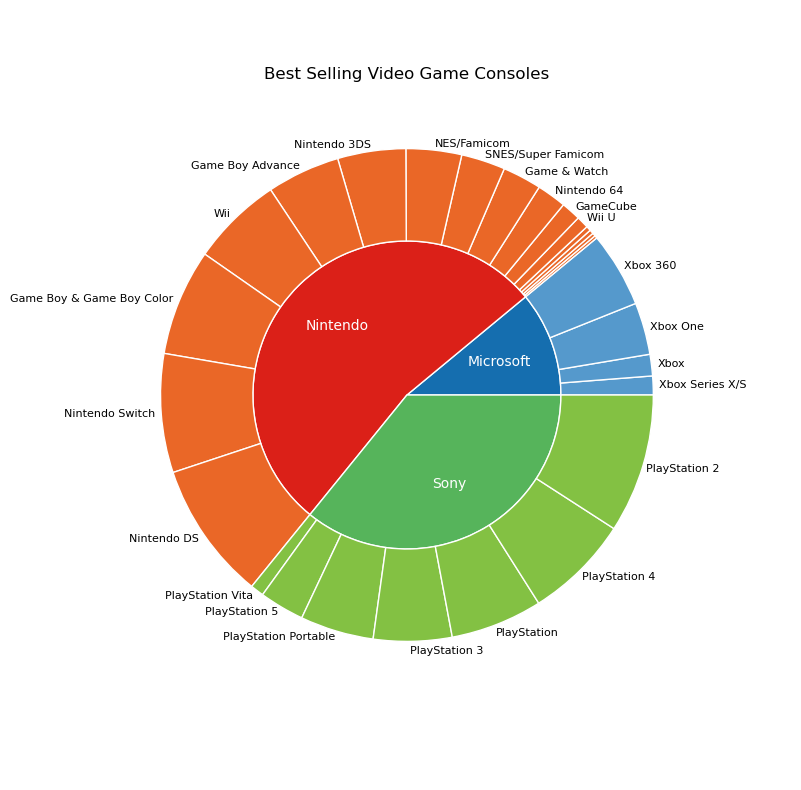

In [3]:
#Load the data
df_consoles = pd.read_csv('consoles.csv')

#Compute company totals
company_summary = df_consoles.groupby('Company')['Units sold'].sum().reset_index()

#Sort from largest to smallest number of units
df_consoles.sort_values(by=['Company', 'Units sold'], ascending=[True, True], inplace=True)

#Setup colors 
inner_ring_colors = ['#156eaf', '#db2018', '#56b45b'] 
outer_ring_colors = ['#5599cc', '#ea6727', '#83c143']
inner_ring_cmap = dict(zip(df_consoles['Company'].unique(), inner_ring_colors))
outer_ring_cmap = dict(zip(df_consoles['Company'].unique(), outer_ring_colors))

#Create Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

#Create inner and outer wedges
inner_wedges, _ = ax.pie(company_summary['Units sold'], radius=0.5, colors=[inner_ring_cmap[company] for company in company_summary['Company']], wedgeprops=dict(width=0.5, ec='w'))  
outer_wedges, _ = ax.pie(df_consoles['Units sold'], radius=0.8, colors=[outer_ring_cmap[company] for company in df_consoles['Company']], wedgeprops=dict(width=0.3, ec='w'))  

#Plot inner labels
for wedge, label in zip(inner_wedges, company_summary['Company']):    
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = 0.32 * np.cos(np.deg2rad(ang))    
    y = 0.32 * np.sin(np.deg2rad(ang))
    ax.text(x, y, label, ha='center', va='center', color='white')

#Get the 4 consoles on Nintendo with the smallest units
last_4_Nintendo = df_consoles[df_consoles['Company'] == 'Nintendo'].sort_values(by='Units sold',ascending=False).iloc[-4:]

#Plot outer labels (exclude Nintendo smallest 4)
for wedge, label in zip(outer_wedges, df_consoles['Platform']):    
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1  
    # Set label distance from center
    x_pos = 0.82 * np.cos(np.deg2rad(angle))
    y_pos = 0.82 * np.sin(np.deg2rad(angle))
    horizontal_align = ''
    if angle > 0 and angle <= 90:
            horizontal_align = 'left'
    elif angle > 90 and angle <= 270:
        horizontal_align = 'right'
    else:
        x_pos = x_pos - 0.01    
        y_pos = y_pos - 0.01
        horizontal_align = 'left'
    if label not in last_4_Nintendo['Platform'].to_list():   
        ax.text(x_pos, y_pos, label, ha=horizontal_align, va='center', color='black', fontsize=8)
        
ax.set_title('Best Selling Video Game Consoles', fontsize=12, loc='center', y=0.9)  
plt.show()

## References

- https://www.youtube.com/watch?v=x0Uguu7gqgk
- https://stackoverflow.com/questions/2417794/
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
- https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
- I referenced some of my previous assignments too